In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv('obesitas.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity


In [4]:
df['NObeyesdad'].unique()

array(['Normal', 'Overweight', 'Obesity', 'Insufficient'], dtype=object)

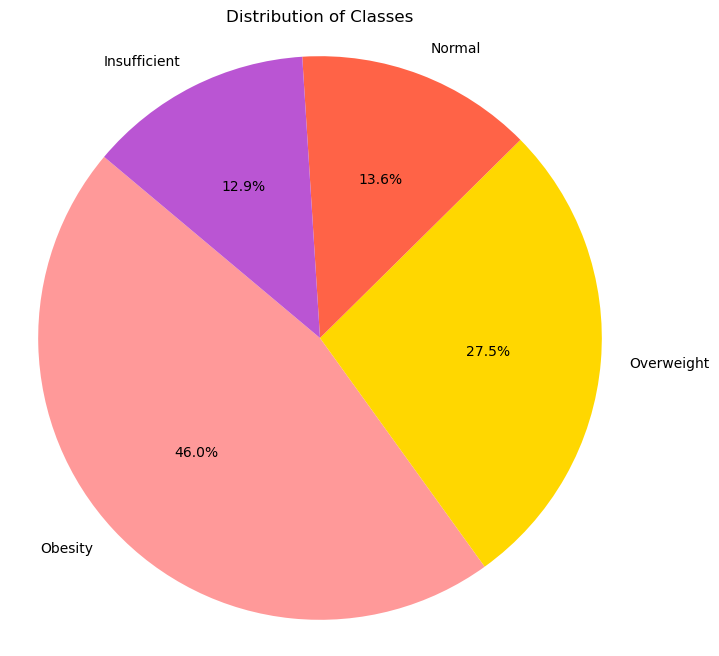

In [5]:
class_counts = df['NObeyesdad'].value_counts()

# Custom colors
custom_colors = ['#FF9999', '#FFD700', '#FF6347', '#BA55D3']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(2087, 17)

In [14]:
X=df.drop(['NObeyesdad'],axis=1)
Y=df['NObeyesdad']
X.shape, Y.shape

((2087, 16), (2087,))

In [47]:
float = LabelEncoder()
X['Gender'] = float.fit_transform(X['Gender'])
X['family_history_with_overweight'] = float.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = float.fit_transform(X['FAVC'])
X['CAEC'] = float.fit_transform(X['CAEC'])
X['SMOKE'] = float.fit_transform(X['SMOKE'])
X['SCC'] = float.fit_transform(X['SCC'])
X['CALC'] = float.fit_transform(X['CALC'])
X['MTRANS'] = float.fit_transform(X['MTRANS'])

In [48]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.values)
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.008179,-0.526613,-0.887408,-0.872985,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,0.554211,1.411836,0.506768
1,-1.008179,-0.526613,-1.960788,-1.178508,0.460394,-2.754719,1.082164,0.390906,0.318128,6.814090,1.636552,4.554073,2.328908,-1.090505,-0.522834,0.506768
2,0.991887,-0.212507,1.044677,-0.376509,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,0.554211,-2.457503,0.506768
3,0.991887,0.415705,1.044677,0.005395,-2.172052,-2.754719,1.082164,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,-1.090505,-2.457503,1.297220
4,0.991887,-0.369560,0.830001,0.112328,-2.172052,-2.754719,-0.788364,-2.225418,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,-1.090505,-0.522834,0.506768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-1.008179,-0.530250,0.086470,1.701376,0.460394,0.363013,1.082164,0.390906,0.318128,-0.146755,-0.454848,-0.219584,0.777546,0.400014,-0.522834,0.506768
2083,-1.008179,-0.372239,0.492788,1.790528,0.460394,0.363013,1.082164,0.390906,0.318128,-0.146755,0.000626,-0.219584,0.385081,-0.104876,-0.522834,0.506768
2084,-1.008179,-0.287258,0.531665,1.788482,0.460394,0.363013,1.082164,0.390906,0.318128,-0.146755,0.081303,-0.219584,0.470422,-0.027545,-0.522834,0.506768
2085,-1.008179,0.001389,0.394745,1.775393,0.460394,0.363013,1.082164,0.390906,0.318128,-0.146755,1.393744,-0.219584,0.148013,-0.126644,-0.522834,0.506768


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
print(model.coef_)

[[-1.18692439e-01 -5.08538964e-01  2.89952451e+00 -1.01832607e+01
  -2.47674689e-01 -2.21586310e-01  3.95678090e-01  9.85768902e-02
  -2.56094554e-01 -1.14603282e-01 -1.59770039e-02 -5.20942284e-02
  -5.71218492e-02  6.60209437e-02  7.40824725e-02  1.15712995e-02]
 [ 3.29270023e-01  6.93646537e-03  1.07262366e+00 -3.57159854e+00
  -1.74081162e-01 -2.46938936e-01  7.32426163e-03  9.75368856e-03
  -3.19790755e-01  1.34456804e-01 -1.11000341e-01 -2.02017401e-02
   8.41481097e-02 -5.52046095e-02  5.09075873e-02  1.16517582e-01]
 [-4.09915271e-01  1.71865796e-01 -3.47350082e+00  1.12675215e+01
   2.77259119e-01  5.55359057e-01 -2.73594627e-01 -6.52175929e-02
   2.93437661e-01  5.50379150e-02  1.08725781e-01 -1.52291626e-01
   1.09830724e-01 -5.26119536e-02 -5.55471244e-02 -9.35539285e-02]
 [ 1.99337687e-01  3.29736703e-01 -4.98647346e-01  2.48733773e+00
   1.44496732e-01 -8.68338109e-02 -1.29407725e-01 -4.31129859e-02
   2.82447649e-01 -7.48914364e-02  1.82515635e-02  2.24587595e-01
  -1.36

In [52]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,Obesity,Obesity
1,Normal,Normal
2,Overweight,Overweight
3,Obesity,Obesity
4,Obesity,Obesity


In [53]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))
print("Precision : ",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall : ",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy :  0.9521531100478469
Precision :  0.9521531100478469
Recall :  0.9521531100478469


Text(0.5, 23.52222222222222, 'True')

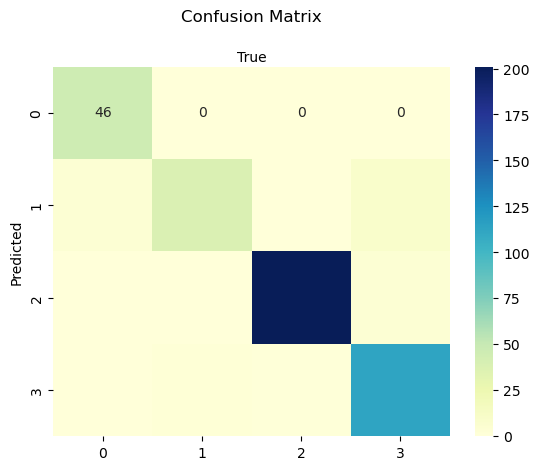

In [54]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Predicted')
plt.xlabel('True')

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 46,   0,   0,   0],
       [  4,  38,   0,   9],
       [  0,   0, 201,   4],
       [  0,   2,   1, 113]], dtype=int64)